In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

#数据导入和查看
data=pd.read_excel('附件3、土壤湿度2022—2012年.xls')
print(data.head())
print('\nData Types:')
print(data.dtypes)


     Month  经度(lon)  纬度(lat)  10cm湿度(kg/m2)  40cm湿度(kg/m2)  100cm湿度(kg/m2)  \
0  2022-01  115.375   44.125          12.45          52.14           93.45   
1  2022-02  115.375   44.125          12.10          52.14           93.45   
2  2022-03  115.375   44.125          14.96          52.13           93.44   
3  2021-01  115.375   44.125          15.17          50.40           82.44   
4  2021-02  115.375   44.125          13.93          50.40           82.44   

   200cm湿度(kg/m2)  
0          164.48  
1          164.48  
2          164.48  
3          165.92  
4          165.92  

Data Types:
Month              object
经度(lon)           float64
纬度(lat)           float64
10cm湿度(kg/m2)     float64
40cm湿度(kg/m2)     float64
100cm湿度(kg/m2)    float64
200cm湿度(kg/m2)    float64
dtype: object


In [23]:
#格式转换
dateparse=lambda dates: pd.datetime.strptime(dates,'%Y-%m')
data=pd.read_excel('附件3、土壤湿度2022—2012年.xls',parse_dates=['Month'],index_col='Month',date_parser=dateparse)
data.head()
# parse_dates：指定包含日期时间信息的列。例子里的列名是'Month‘
# index_col：在TS数据中使用pandas的关键是索引必须是日期等时间变量。所以这个参数告诉pandas使用'Month'列作为索引
# date_parser：它指定了一个将输入字符串转换为datetime可变的函数。pandas 默认读取格式为'YYYY-MM-DD HH:MM:SS'的数据。
data = data.sort_values(by='Month', ascending=True)

C:\Users\zyaaa\AppData\Local\Temp/ipykernel_24696/3753754133.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse=lambda dates: pd.datetime.strptime(dates,'%Y-%m')


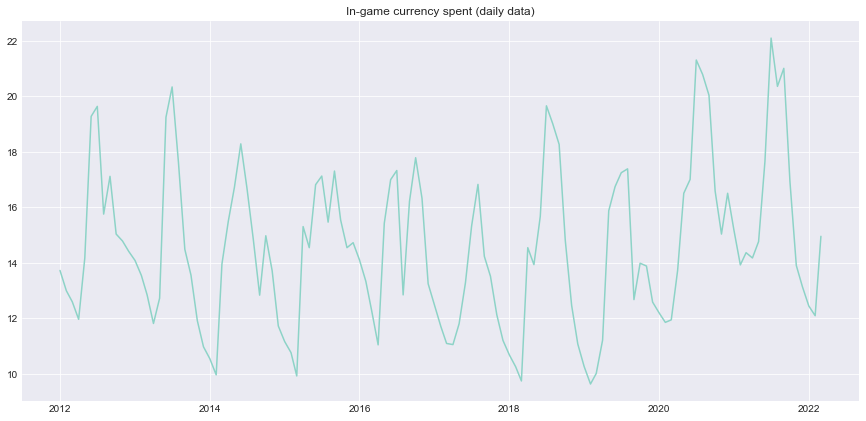

In [27]:
data_10 = pd.DataFrame(data.iloc[:,2])

plt.figure(figsize=(15, 7))
plt.plot(data_10)
plt.title('In-game currency spent (daily data)')
plt.grid(True)
plt.style.use('seaborn-darkgrid') # 设置画图的风格 
plt.show()

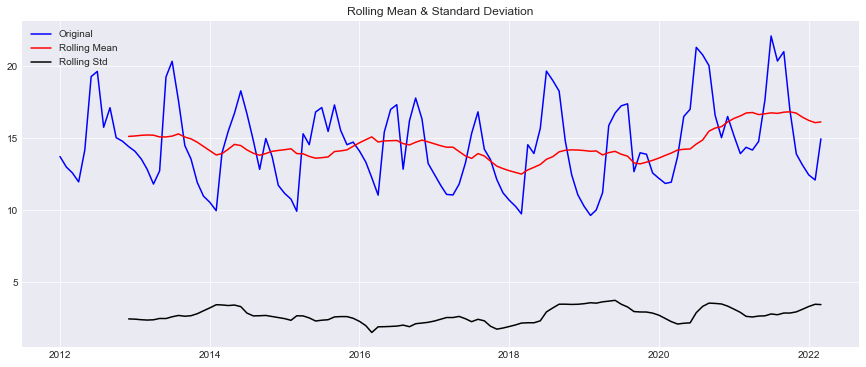

Results of Dickey-Fuller Test:
Test Statistic                  -1.449926
p-value                          0.558121
#Lags Used                      13.000000
Number of Observations Used    109.000000
Critical Value (1%)             -3.491818
Critical Value (5%)             -2.888444
Critical Value (10%)            -2.581120
dtype: float64


In [28]:
#导入包
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    #Determing rolling statistics 
    rolmean=timeseries.rolling(12).mean()
    rolstd=timeseries.rolling(12).std()
    #Plot rolling statistics:
    orig=plt.plot(timeseries,color='blue',label='Original') 
    mean=plt.plot(rolmean,color='red',label='Rolling Mean') #均值
    std=plt.plot(rolstd,color='black',label='Rolling Std') #标准差
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.style.use('seaborn-darkgrid') # 设置画图的风格 
    plt.show(block=False)
    
    #Perform Dickey-Fuller Test:
    print('Results of Dickey-Fuller Test:')
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value 
    print(dfoutput)

#检验结果
test_stationarity(data_10)

In [29]:
# define function for ADF 
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):  #Perform KPSS Test:
    print('Results of KPSS Test:')
    kpsstest=kpss(timeseries,regression='c')
    kpss_output=pd.Series(kpsstest[0:3],index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key]=value 
    print(kpss_output)
    
kpss_test(data_10)

Results of KPSS Test:
Test Statistic            0.199498
p-value                   0.100000
#Lags Used               13.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


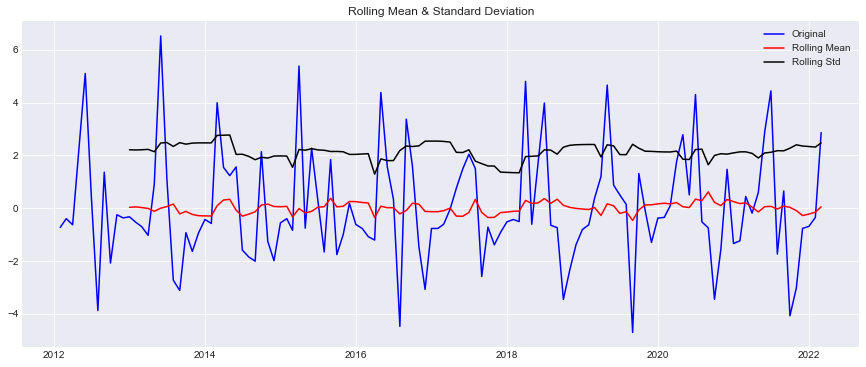

Results of Dickey-Fuller Test:
Test Statistic                  -4.368503
p-value                          0.000337
#Lags Used                      12.000000
Number of Observations Used    109.000000
Critical Value (1%)             -3.491818
Critical Value (5%)             -2.888444
Critical Value (10%)            -2.581120
dtype: float64


In [33]:
#Differencing 
data_10_diff=data_10-data_10.shift()

# reduced trend considerably
data_10_diff.dropna(inplace=True)
test_stationarity(data_10_diff)

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


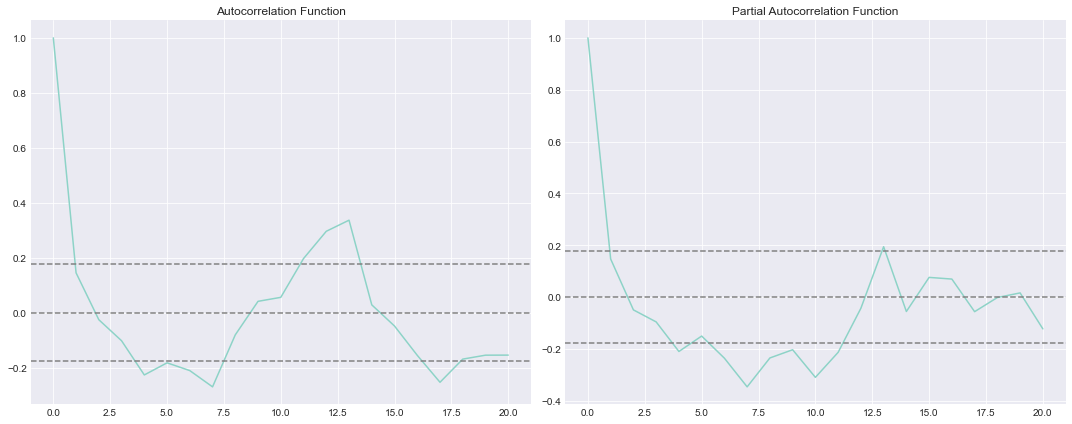

In [34]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf,pacf

lag_acf=acf(data_10_diff,nlags=20)
lag_pacf=pacf(data_10_diff,nlags=20,method='ols')

#Plot ACF：
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_10_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_10_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF：
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_10_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_10_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


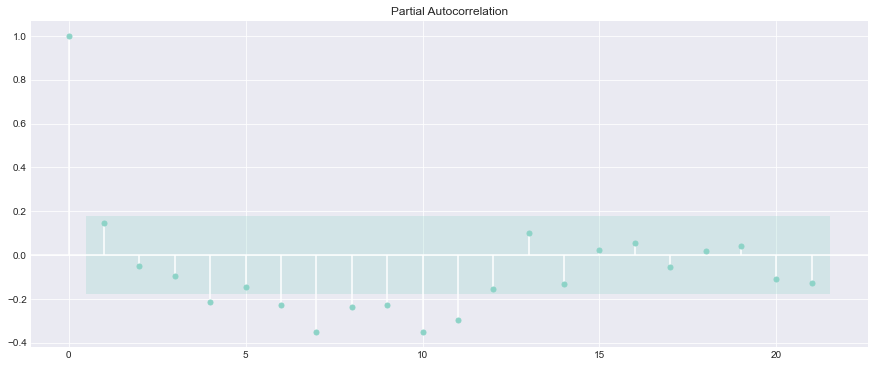

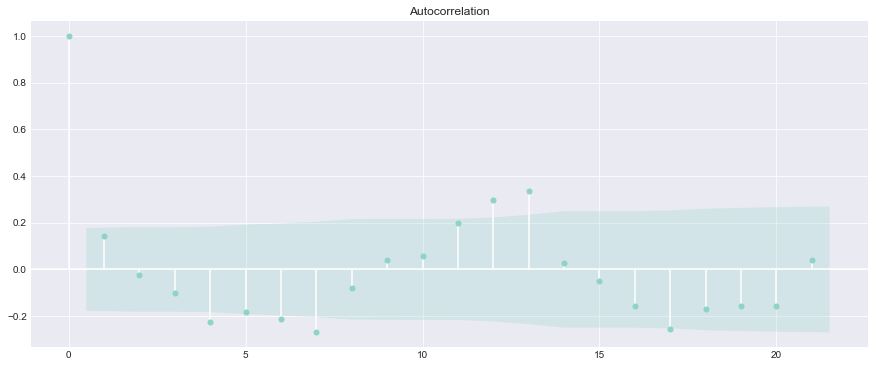

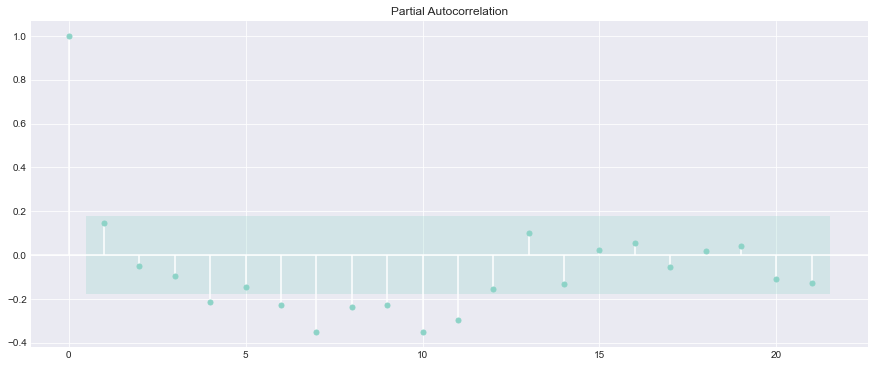

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_10_diff)
plot_pacf(data_10_diff)

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

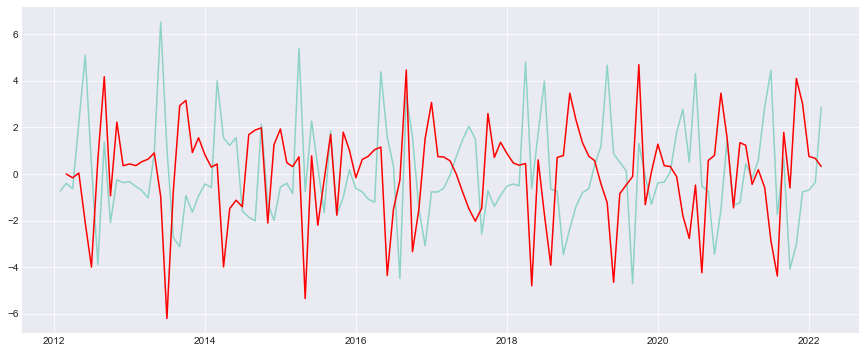

In [55]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data_10_diff,order=(0,1,1))
results_ARIMA=model.fit(disp=-1)
plt.plot(data_10_diff)
plt.plot(results_ARIMA.fittedvalues,color='red')

2012-01-01    13.000000
2012-03-01    12.999819
2012-04-01    12.834547
2012-05-01    12.877519
2012-06-01    10.779566
                ...    
2021-11-01    11.958826
2021-12-01    14.969578
2022-01-01    15.723757
2022-02-01    16.392136
2022-03-01    16.717621
Length: 122, dtype: float64


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


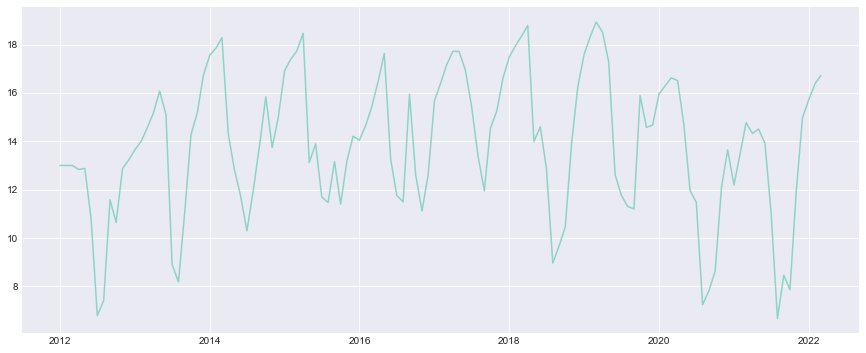

In [72]:
yhat = results_ARIMA.predict()
yhat_restored = pd.Series([13], index=[data_10.index[0]]) .append(yhat).cumsum()

print(yhat_restored)
plt.plot(yhat_restored)

In [63]:
time_series = pd.Series([2,4,3,5,6,7,4,5,6,3,2,4], index=pd.date_range(start='2000', periods=12, freq='a'))
time_series_diff = time_series.diff(1).dropna()
time_series_restored = pd.Series([time_series[0]], index=[time_series.index[0]]) .append(time_series_diff).cumsum()